# Proyecto Final - Paralelización de la ecuación de calor en 2D

## Rubén Pérez Palacios


La ecuación de calor describe la distribución del calor en una región a lo largo del transcurso del tiempo. Empezaremos por explicar la deducción de dicha ecuación para el caso unidimensional.

### Caso unidimesional

Para ello consideraremos una varilla perfectamente aislada, de tamaño $ L $ y con un área de sección transversal $ A $. Además asumiremos que:

* La varilla es despreciablemente delgada, es decir el calor solo se mueve horizontalmente.
* No hay fuentes externas de calor, o por donde se escape este.
* El material de la varilla es uniforme; es decir tiene una temperatura especifica $ c(x) $ (la energía de temperatura que se requiere para aumentar un grado de temperatura una unidad de masa), y densidad de masa $ \rho(x) $.

Definamos:

* $ e(x,t) := $ Energía termal.
* $ \Phi(x,t) := $ Flujo de calor (cantidad de energía termal por unidad de tiempo que fluyea la derecha por unidad de área de la superficie).
* $ Q(x,t) := $ Cantidad de energía de calor generada por unidad de tiempo por unidad de volumen.
* $ u(x,t) := $ Temperatura.

La ecuación fundamental de la termódinamica nos relaciona el calor con la masa y la temperatura de la superficie de la siguiente forma:

$$ e(x,t) = c(x)\rho(x)u(x,t) \quad (1). $$

Luego por la ley de la conservación de la energía tenemos que

$$ \underbrace{\frac{\partial}{\partial t} (e(\xi_1,t)A\Delta x)}_{\text{Tasa de cambio de la Energía de calor}} \quad = \quad \underbrace{\Phi(x,t)A - \Phi(x+\Delta x, t)A}_{\text{Flujo de Energía en los extremos}} \quad + \quad \underbrace{Q(\xi_2,t)A\Delta x}_{\text{Energía de calor generada por unidad de tiempo}}, $$

puesto que la varilla es aislada e uniforme entonces $ Q(x,t) = 0 $, tomando el límite cuando $ \Delta x \rightarrow 0 $ obtenemos

$$ \frac{\partial e(x,t)}{\partial t} = -\frac{\partial\Phi(x,t)}{\partial x} \quad (2). $$

Por la Ley de Furier de conducción del calor tenemos que

$$ \Phi(x,t) = -K_0(x)\frac{\partial u(x,t)}{\partial x} (3), $$

donde $ K_0 $ es la conductividad material de nuestro material (notese que al ser uniforme nuestro material esta es constante).

Haciendo uso de $ (1),(2),(3) $, concluimos que

$$ \frac{\partial u}{\partial t} = \left(\frac{K_0}{c\rho}\right) \frac{\partial^2u}{\partial x^2}. $$

Para que la solución sea única se necesita de la condición inicial:

$$ u(x,0), $$

las condiciones de frontera:

$$ u(0,t), u(L,t), $$

y además la conductividad del material $ K_0 $, su temperatura específica $ c $, y su densidad de masa $ \rho $.

### Caso bidimesional

La ecuación está dada por:

$$ \frac{\partial u}{\partial t} = \left(\frac{K_0}{c\rho}\right) \left(\frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2}\right), $$

con $ u,K_0, c, \rho $ definidas como en el caso unidemensinal.

Para el caso que trabajaremos tomamos como dominio:

$$ [0,1]\times [0,1], $$

con condición inicial

$$ u((x,y),0) = sin(x+y)^2, $$

con condiciones de frontera

$$ u((0,y),t) = u((1,y),t) = u((x,0),t) = u((x,1),t) = 1, $$

y con $ \frac{K_0}{c\rho} = 1 $.

## Método de diferencia finitas

Técnica numérica para resolver ecuaciones diferenciales mediante la aproximación con diferencias finitas. Esto se logra apartir de discretisar el dominio de una función para posteriormente aproximar el valor de la solución en estos puntos mediante la solución de ecuaciones algebráicas.

### Aproximación de primera y segunda derivada

Sea $ f\in C^{(\infty)}(R) $. Por Taylor se cumple que

$$ f(x + h) = f(x) + \frac{f'(x)}{1!}h + \frac{f''(x)}{2!}h^2 + O(h^3) $$
$$ f(x - h) = f(x) - \frac{f'(x)}{1!}h + \frac{f''(x)}{2!}h^2 + O(h^3) $$

de la cuales obtenemos las siguientes ecuaciones

$$ f'(x) = \frac{f(x+h) - f(x)}{h} + O(h) $$
$$ f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} + O(h^3) $$

Aplicando estas últimas dos ecuaciones a la función de calor $ u $ obtenemos

$$ \frac{\partial u}{\partial t} = \frac{u(x,y,t+\Delta t) - u(x,y,t)}{\Delta t} $$
$$ \frac{\partial^2 u}{\partial x^2} = \frac{u(x+\Delta x,y,t) - 2u(x,y,t) + u(x-\Delta x,y,t)}{\Delta x^2} $$
$$ \frac{\partial^2 u}{\partial y^2} = \frac{u(x,y+\Delta y,t) - 2u(x,y,t) + u(x,y-\Delta y,t)}{\Delta y^2} $$

Por último sustituyendo en la ecuación del calor bidimensional obtenemos

$$ \begin{align*}
u(x,y,t+\Delta t) &\sim \left(\frac{K_0}{c\rho}\right)\left(\frac{\Delta t}{\Delta x^2}\right)\left(u(x+\Delta x,y,t) - 2u(x,y,t) + u(x-\Delta x,y,t)\right)\\
&+ \left(\frac{K_0}{c\rho}\right)\left(\frac{\Delta t}{\Delta y^2}\right)\left(u(x,y+\Delta y,t) - 2u(x,y,t) + u(x,y-\Delta y,t)\right)\\
&+ u(x,y,t)\\
\end{align*} $$

Entonces ya tenemoso una aproximación de la función de calor en el tiempo $ t+\delta t $ en función se sus valores en el tiempo $ t $ por lo que si conocemos su valor inicial en un tiempo $ t_0 $ entonces podemos ir calculando iterativamente los valores de $ u $ en un dominio discreto, avanzando en el tiempo. Puesto que los puntos frontera no tienen definido esta recursión es necesario indicar sus valores.

## Estrategia para cáculo en paralelo

Para paralelizar el cálculo de la función $ u $ en un tiempo $ t_0 + \Delta t $ haremos uso de la recursión anterior y de una rejilla que discretice nuestro dominio dimensional. Ahora ésta rejilla la diviremos en $ numThreads $ columnas, y cada hilo se encargara de calcular el valor de $ u $ en el tiempo $ t_0 + \Delta t $ de una columna (esto si los hilos son suficientes si no se reutilizaran). Fijarnos que dentro de cada subloque tendremos bordes que son compartidos entre subloques contiguos por lo que estos necesitaran información uno del otro, esto lo solucionamos aumentando en uno cada frontera compartida para que así se calcule todo bloque ya que todo los puntos originales son interiores de este nuevo, aunque falte ésta nueva frontera; pero como esta ya fue cáclulada por el bloque contiguo entonces basta con actualizar este valor con el nuevo. A este último se le conoce como estrategia de bloques sobrepuestos.

En la siguiente imagen podemos apreciar como cada subloque se sobrepuso a sus contiguos. Así como las columnas compartidas están unidas por flechas.





C:\Users\batma\AppData\Local\Temp\ipykernel_17336\2958281536.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


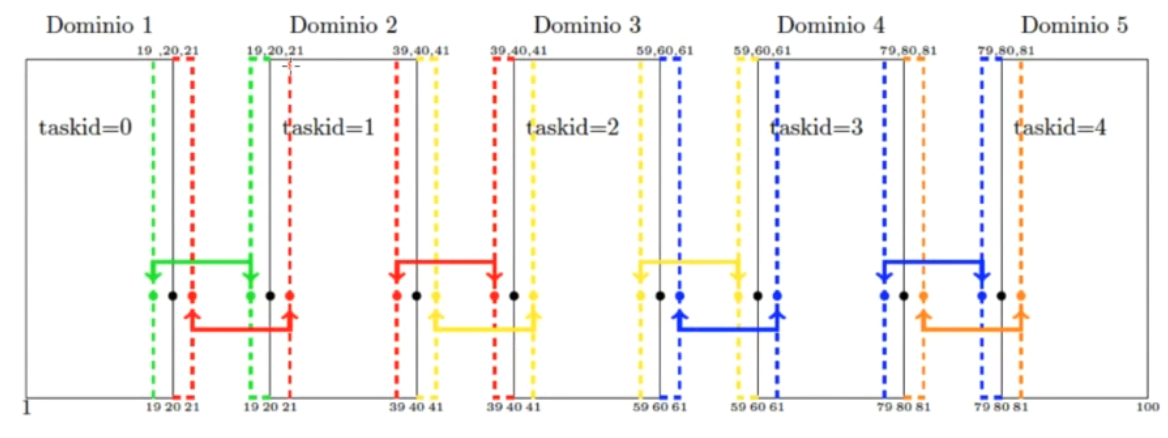

In [3]:
from IPython.core.display import Image, display
display(Image("bloques_sobrepuestos.png"))

## Resultados

Se hizo uso de los parametros ya indicados en la ecuación del calor bidimensional, además de los siguiente parámetros para su discretización

* Tiempo inicial: 0s
* Tiempo final: 0.5s
* Numero de divisiones en el tiempo: 100000
* Numero de divisiones en x: 200
* Numero de divisiones en y: 200

Se obtuvieron los siguientes resultados

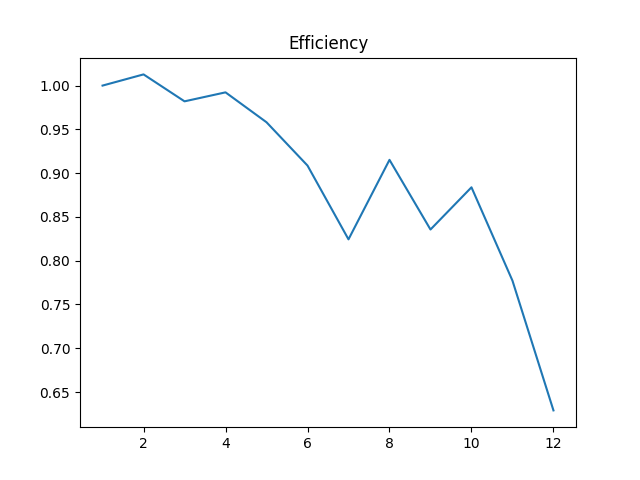

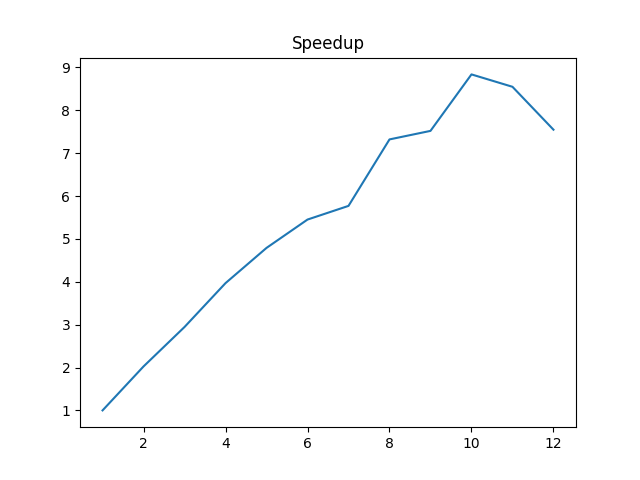

In [4]:
display(Image("efficiency.png"))
display(Image("speedup.png"))

## Conclusiones y Bibliografía

Podemos ver que si obtenemos un mejor tiempo mientras más hilos usemos, aunque cada vez la ganacia es menos. En especial podemos ver que con 8 hilos obtenemos un tiempo muy similar a usar más hilos y este tiene un effciency mayor a $ 0.9 $.

El uso del computo paralelo nos permitio calcular de forma más rapida la aproximación de la función de calor, por lo que podemos también obtener una mejor aproximación en el mismo tiempo que si lo hicieramos en serial. Esto ejemplifica que el uso de computo paralelo pueda ser muy util en el intercambio de exactitud y tiempo.

Las fuentes usadas fueron:

1. https://en.wikipedia.org/wiki/Heat_equation
2. https://medium.com/math-simplified/the-intuition-behind-the-heat-equation-303b6ddcfed3
3. https://jmahaffy.sdsu.edu/courses/s17/math531/beamer/heat.pdf
4. http://ramanujan.math.trinity.edu/rdaileda/teach/s17/m3357/lectures/lecture9.pdf
5. https://en.wikipedia.org/wiki/Finite_difference_method
6. https://www.ljll.math.upmc.fr/frey/cours/UdC/ma691/ma691_ch6.pdf